Read in 3d magnetic field datacube, and plot field line helicity of original field $\bf B$ and reference field $\bf B_p$ in minimal gauge. 

Also plot the relative field-line helicity (i.e. their difference) for this gauge.

In [ ]:
import numpy as np
from flhcart import BField
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
import time

Create 3d magnetic field object

- creating this object automatically computes A in the DeVore-Coulomb gauge

In [ ]:
b = BField('bhesse.nc')

Computing A...


Compute potential reference field and its vector potential

In [ ]:
b.computePotentialField()
b.computeADeVore(potential=True)

Computing potential field...
Computing Ap...


Change both vector potentials to minimal gauge

- alternatively, you could just change $\bf A_p$, then match $\bf A$ to it with `b.matchPotentialGauge()`.

In [ ]:
b.matchUniversalGauge()
b.matchUniversalGauge(potential=True)

Matching Axn to universal gauge on each boundary...
Matching Apxn to universal gauge on each boundary...


array([[[ 0.00000000e+00, -2.64648330e+01, -6.18336293e+01, ...,
         -6.63776010e+03, -6.72424259e+03, -6.79637950e+03],
        [ 5.94572608e+00, -2.93281403e+01, -7.04895738e+01, ...,
         -6.62870575e+03, -6.72250227e+03, -6.80994202e+03],
        [ 1.77453164e+01, -2.63038805e+01, -7.40657552e+01, ...,
         -6.62669325e+03, -6.72711874e+03, -6.82508965e+03],
        ...,
        [-7.59867500e+02, -8.12253548e+02, -8.70840816e+02, ...,
         -8.82674379e+03, -8.93799468e+03, -9.04430243e+03],
        [-7.84942432e+02, -8.28521947e+02, -8.81315022e+02, ...,
         -8.91629321e+03, -9.02172138e+03, -9.11746677e+03],
        [-8.00000055e+02, -8.35576784e+02, -8.84220923e+02, ...,
         -9.01537303e+03, -9.11513085e+03, -9.19637967e+03]],

       [[ 9.48943147e+01,  6.92975166e+01,  3.66273619e+01, ...,
         -6.15236092e+03, -6.21979165e+03, -6.26456111e+03],
        [ 1.12065981e+02,  7.79262172e+01,  3.73316867e+01, ...,
         -6.33835771e+03, -6.40894841e

Choose grid of field lines at height $z = z_0$

In [ ]:
z0 = 0
nx = 128
ny = 128
x1 = np.linspace(b.x1[0], b.x1[-1], nx)
y1 = np.linspace(b.y1[0], b.y1[-1], ny)
x1s, y1s = np.meshgrid(x1,y1)
z1s = x1s*0 + z0
x0 = np.stack((x1s.flatten(), y1s.flatten(), z1s.flatten()), axis=1)

In [ ]:
x0

array([[-20.        , -20.        ,   0.        ],
       [-19.68503937, -20.        ,   0.        ],
       [-19.37007874, -20.        ,   0.        ],
       ...,
       [ 19.37007874,  20.        ,   0.        ],
       [ 19.68503937,  20.        ,   0.        ],
       [ 20.        ,  20.        ,   0.        ]])

Trace field lines and compute field-line helicity of $\bf B$ and $\bf B_p$

In [ ]:
flh = b.flHelicity(x0)
flh = flh.reshape(nx, ny)
flhp = b.flHelicity(x0, potential=True)
flhp = flhp.reshape(nx, ny)

rflh = flh - flhp

rflh.shape

Tracing 16384 field lines...
Tracing 16384 field lines...


(128, 128)

Plots

In [ ]:
fig = plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

FLH of $\bf B$

In [ ]:
ax = fig.add_subplot(131)
ax.set_xlim(b.x1[0], b.x1[-1])
ax.set_ylim(b.y1[0], b.y1[-1])
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('FLH of B, z = %g' % z0)
pm = ax.pcolormesh(x1, y1, flh, cmap='bwr')
cmax = np.max(np.abs(flh))
pm.set_clim(vmin=-cmax, vmax=cmax)
plt.colorbar(pm)

<matplotlib.colorbar.Colorbar>

<Figure size 640x480 with 0 Axes>

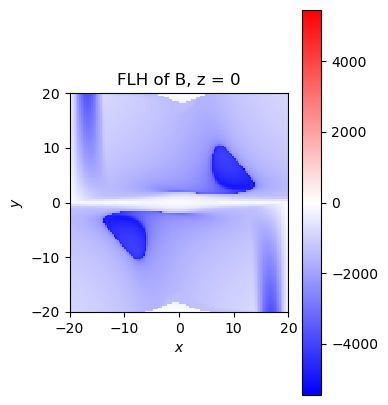

In [ ]:
fig

FLH of $\bf B_p$

In [ ]:
ax = fig.add_subplot(132)
ax.set_xlim(b.x1[0], b.x1[-1])
ax.set_ylim(b.y1[0], b.y1[-1])
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('FLH of Bp, z = %g' % z0)
pm = ax.pcolormesh(x1, y1, flhp, cmap='bwr')
cmax = np.max(np.abs(flh))
pm.set_clim(vmin=-cmax, vmax=cmax)
plt.colorbar(pm)

<matplotlib.colorbar.Colorbar>

<Figure size 640x480 with 0 Axes>

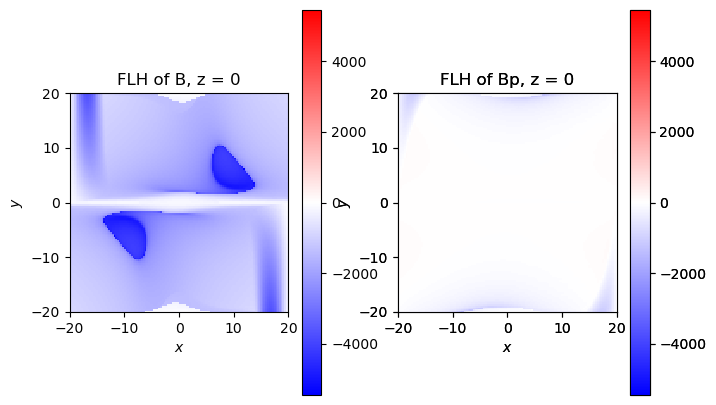

In [ ]:
fig

Relative FLH

In [ ]:
ax = fig.add_subplot(133)
ax.set_xlim(b.x1[0], b.x1[-1])
ax.set_ylim(b.y1[0], b.y1[-1])
ax.set_aspect('equal')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('relative FLH, z = %g' % z0)
pm = ax.pcolormesh(x1, y1, rflh, cmap='bwr')
cmax = np.max(np.abs(rflh))
pm.set_clim(vmin=-cmax, vmax=cmax)
plt.colorbar(pm)

<matplotlib.colorbar.Colorbar>

<Figure size 640x480 with 0 Axes>

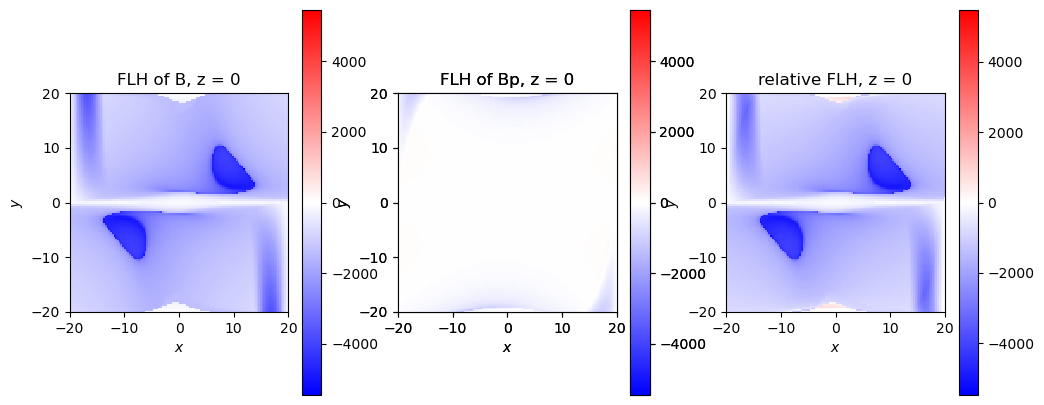

In [ ]:
fig

In [ ]:
fig.savefig('flhminimal.png', bbox_inches='tight')